In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [3]:
dfc = pd.read_csv('data/candidate_result.csv')
dfc.head()

,seat,year,party,name,votes,votes_pc,winner
0,Dhaka-3,2008,BNP,Gayeshwar Chandra Roy,70680.0,36.71,no
1,Dhaka-6,1991,Independent,Sayed Sharafat Hossain,8.0,0.01,no
2,Dhaka-6,1991,Jatiya Janata Party (Asad),Md. Afzalul Huq Afzal,9.0,0.01,no
3,Comilla-3,2001,Independent,Md. Ainul Haque,12.0,0.01,no
4,Dhaka-5,1991,Jatiyatabadi Gonotantrik Chashi Dal,Afzaluddin Chowdhury,14.0,0.01,no


In [4]:
dfc.shape

(8747, 7)

In [5]:
# only take 4 elections data
dfc = dfc[dfc.year.isin(years)]
dfc.shape

(8183, 7)

In [6]:
# only take winners data
dfcwin = dfc[dfc.winner == 'yes']
dfcwin.head()

,seat,year,party,name,votes,votes_pc,winner
5411,Noakhali-3,1991,BNP,Salah Uddin Kamran,11378.0,22.23,yes
5749,Mymensingh-8,1991,JaPa,Khurram Khan Chowdhury,18209.0,24.68,yes
5805,Barguna-2,1991,Independent,Nurul Islam Moni,19616.0,28.41,yes
5860,Kurigram-3,1991,AL,Md. Amjad Hossain Talukdar,20547.0,23.74,yes
5896,Noakhali-1,1991,BNP,Zainul Abdin Farroque,21418.0,31.97,yes


In [7]:
dfcwin.shape

(1150, 7)

In [8]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [9]:
# define each election winners
year_party_win = [(1991, 'BNP'), (1996, 'AL'), (2001, 'BNP'), (2008, 'AL')]
year_winner_seats = []

# find the list of seats won by the election winner party each year
for year, party in year_party_win:
    seats = dfcwin[(dfcwin.year == year) & (dfcwin.party == party)]['seat']
    year_winner_seats.append(set(seats))

In [10]:
# create a dictionary, one key for each seat
swing_count = {seat: 0 for seat in bdmap['seat'].to_list()}

# find swing count of each seat
# change in the winner party in consecutive election in a seat adds 1 to the swing count of that seat

# between 4 elections, max 3 swing is possible
for count in range(1, len(year_party_win)):
    for i in range(len(year_winner_seats) - count):
        swing_seats = set.intersection(*year_winner_seats[i : i+count+1])
        for seat in swing_seats:
            swing_count[seat] = count

print(swing_count)

{'Panchagarh-1': 1, 'Panchagarh-2': 1, 'Thakurgaon-1': 2, 'Thakurgaon-2': 0, 'Thakurgaon-3': 0, 'Dinajpur-1': 0, 'Dinajpur-2': 2, 'Dinajpur-3': 1, 'Dinajpur-4': 2, 'Dinajpur-5': 0, 'Dinajpur-6': 0, 'Nilphamari-1': 0, 'Nilphamari-2': 0, 'Nilphamari-3': 0, 'Nilphamari-4': 1, 'Lalmonirhat-1': 0, 'Lalmonirhat-2': 0, 'Lalmonirhat-3': 0, 'Rangpur-1': 0, 'Rangpur-2': 0, 'Rangpur-3': 0, 'Rangpur-4': 0, 'Rangpur-5': 0, 'Rangpur-6': 0, 'Kurigram-1': 0, 'Kurigram-2': 0, 'Kurigram-3': 0, 'Kurigram-4': 0, 'Gaibandha-1': 0, 'Gaibandha-2': 0, 'Gaibandha-3': 0, 'Gaibandha-4': 1, 'Gaibandha-5': 0, 'Joypurhat-1': 0, 'Joypurhat-2': 0, 'Bogra-1': 1, 'Bogra-2': 0, 'Bogra-3': 0, 'Bogra-4': 0, 'Bogra-5': 1, 'Bogra-6': 0, 'Bogra-7': 0, 'Chapai Nawabganj-1': 1, 'Chapai Nawabganj-2': 0, 'Chapai Nawabganj-3': 1, 'Naogaon-1': 0, 'Naogaon-2': 1, 'Naogaon-3': 1, 'Naogaon-4': 0, 'Naogaon-5': 0, 'Naogaon-6': 1, 'Rajshahi-1': 1, 'Rajshahi-2': 0, 'Rajshahi-3': 1, 'Rajshahi-4': 1, 'Rajshahi-5': 1, 'Rajshahi-6': 0, 'Nato

In [11]:
# join data with map data
map_swing = bdmap.copy()
map_swing['swing_count'] = map_swing['seat'].map(swing_count)
map_swing.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry,swing_count
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494...",1
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971...",1
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788...",2
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,...",0
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391...",0


In [12]:
map_swing[['seat', 'swing_count']].to_csv('dataout/mainp_win_swing.csv', index=False)

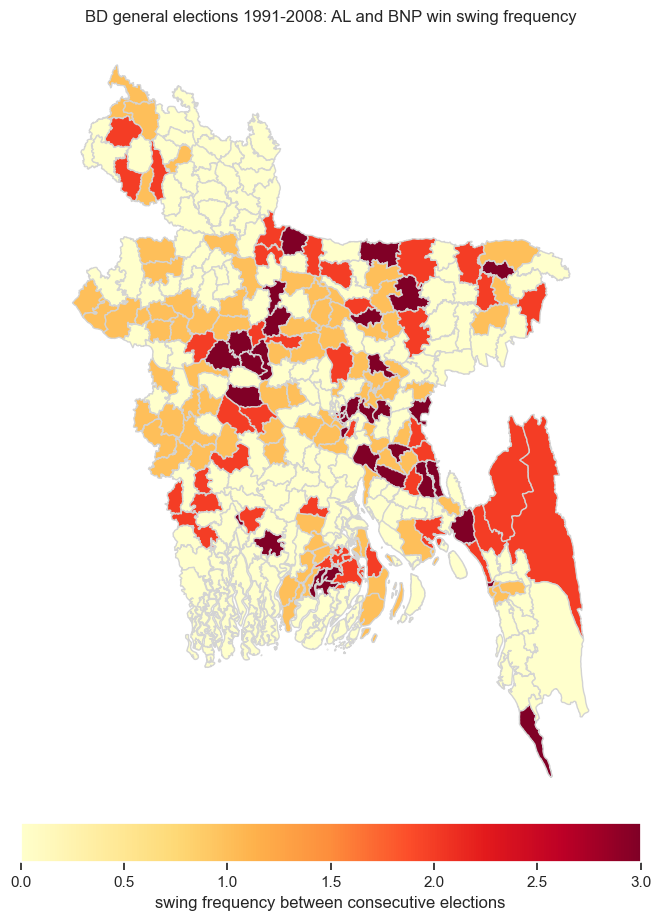

In [18]:
# plot map
fig, ax = plt.subplots(figsize=(8, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

map_swing.plot(
    column='swing_count', 
    cmap='YlOrRd', 
    edgecolor='lightgrey',
    legend=True, 
    ax=ax,
    cax=cax,
    legend_kwds={
        'label': 'swing frequency between consecutive elections',
        'orientation': 'horizontal'
    }
)
ax.set_axis_off()
ax.title.set_text("BD general elections 1991-2008: AL and BNP win swing frequency")
fig.savefig('fig/mainp_win_swing',bbox_inches='tight')

In [17]:
# save interactive map
fol = map_swing.explore(
    column='swing_count', 
    cmap='plasma', 
    popup=True,
    tooltip='swing_count',
    legend=True, 
    legend_kwds={
        'label': 'swing frequency between consecutive elections',
        'orientation': 'horizontal'
    }
)

fol.save('mapout/mainp_win_swing.html')